# Why Quant Traders Care About Pricing

This notebook exples the concept of **expected value** in the context of different games and stochastic processes. 

We simulate and visualize how paying above or below the expected value can affect long-term wealth.

# Part 1: Coin Flipping Game

Suppose we flip a fair coin.

If heads, you win 2$. If tails, you win nothing.

What is the expected value?

In [1]:
# Expected value calculation
p_heads = 0.5
p_tails = 0.5
reward_heads = 2
reward_tails = 0

expected_value = p_heads * reward_heads + p_tails * reward_tails
expected_value

1.0

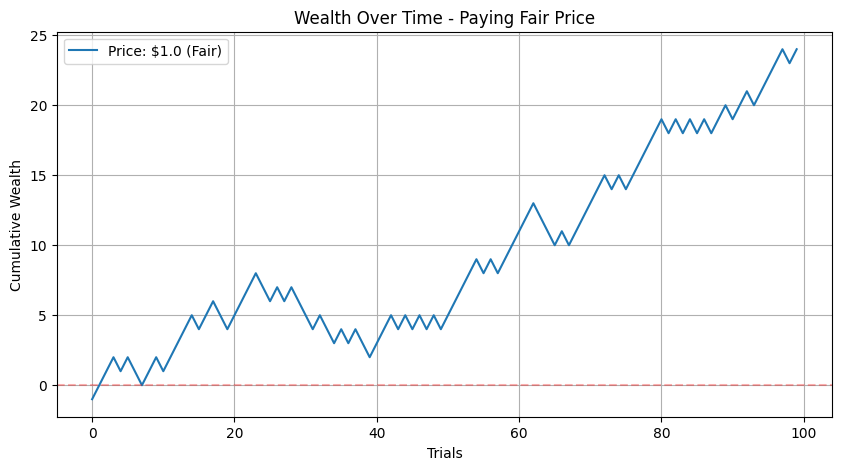

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_coin_game(price, n_trials=1000):
    outcomes = np.random.choice([2, 0], size=n_trials, p=[0.5, 0.5])
    net_gain = outcomes - price
    wealth = np.cumsum(net_gain)
    return wealth

# Simulate paying fair price
fair_price = 1.0
wealth_fair = simulate_coin_game(fair_price, 100)

plt.figure(figsize=(10,5))
plt.plot(wealth_fair, label=f'Price: ${fair_price} (Fair)')
plt.axhline(y=0, color='r', linestyle='--', alpha=0.3)
plt.title('Wealth Over Time - Paying Fair Price')
plt.xlabel('Trials')
plt.ylabel('Cumulative Wealth')
plt.legend()
plt.grid(True)
plt.show()

Sample outcomes: [2 2 0 2 0 0 2 2 0 0]
Sample net gains: [ 1.  1. -1.  1. -1. -1.  1.  1. -1. -1.]
Expected net gain per game: 0.0 

Average outcome per game: 1.000248
Average net gain per game: 0.000248
Average terminal wealth across 10000 paths: $0.02


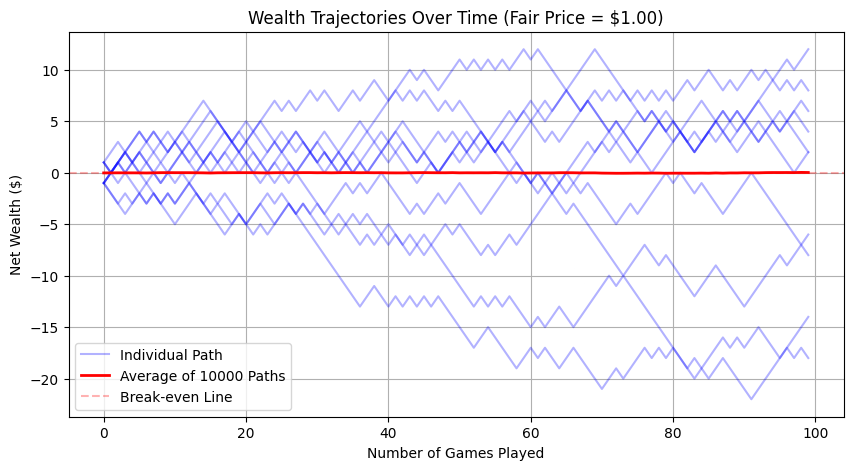

In [3]:
# Let's verify the simulate_coin_game function is working as expected
test_outcomes = np.random.choice([2, 0], size=10, p=[0.5, 0.5])
test_net_gain = test_outcomes - fair_price
print("Sample outcomes:", test_outcomes)
print("Sample net gains:", test_net_gain)
print("Expected net gain per game:", 0.5*2 + 0.5*0 - fair_price, "\n")

# Generate all paths once to reuse
n_paths = 10000  # Number of paths to simulate
n_trials = 100  # Number of trials per path

# Explicitly calculate each step to debug
outcomes = np.random.choice([2, 0], size=(n_paths, n_trials), p=[0.5, 0.5])
net_gains = outcomes - fair_price
all_paths = np.cumsum(net_gains, axis=1)

# Verify the calculations
print("Average outcome per game:", np.mean(outcomes))
print("Average net gain per game:", np.mean(net_gains))

# Calculate terminal wealths from existing paths
terminal_wealths = all_paths[:,-1]  # Get last value of each path
avg_terminal_wealth = np.mean(terminal_wealths)
print(f"Average terminal wealth across {n_paths} paths: ${avg_terminal_wealth:.2f}")

# Plot multiple paths
plt.figure(figsize=(10,5))

# Plot 10 sample paths from our existing paths
for i in range(10):
    plt.plot(all_paths[i], alpha=0.3, color='blue', 
             label='Individual Path' if i == 0 else "_nolegend_")

# Calculate and plot average path from existing paths
average_path = np.mean(all_paths, axis=0)
plt.plot(average_path, color='red', linewidth=2, label=f'Average of {n_paths} Paths')
plt.axhline(y=0, color='r', linestyle='--', alpha=0.3, label='Break-even Line')
plt.title('Wealth Trajectories Over Time (Fair Price = $1.00)')
plt.xlabel('Number of Games Played')
plt.ylabel('Net Wealth ($)')
plt.legend()
plt.grid(True)
plt.show()

##  Scenario 2: Pay Below Expected Value

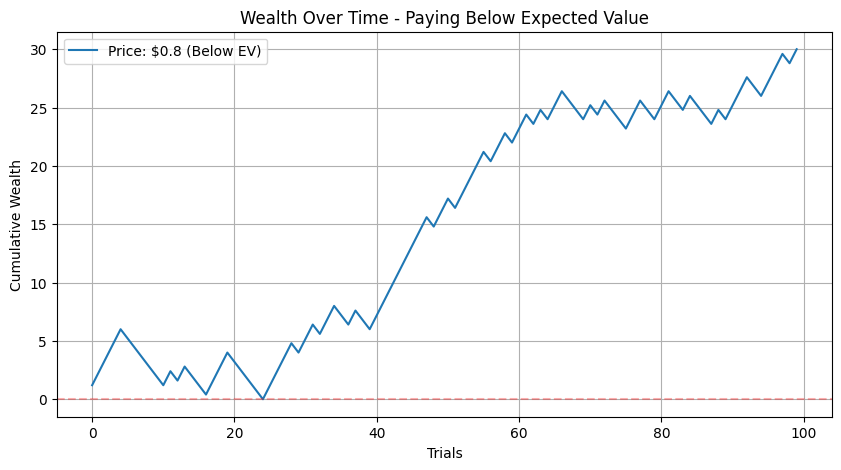

In [4]:
# Simulate paying below expected value
below_ev_price = 0.80
wealth_below = simulate_coin_game(below_ev_price, 100)

plt.figure(figsize=(10,5))
plt.plot(wealth_below, label=f'Price: ${below_ev_price} (Below EV)')
plt.axhline(y=0, color='r', linestyle='--', alpha=0.3)
plt.title('Wealth Over Time - Paying Below Expected Value')
plt.xlabel('Trials')
plt.ylabel('Cumulative Wealth')
plt.legend()
plt.grid(True)
plt.show()

Analytical expected value after 100 games: $20.00
Average terminal wealth across 10000 paths: $19.93


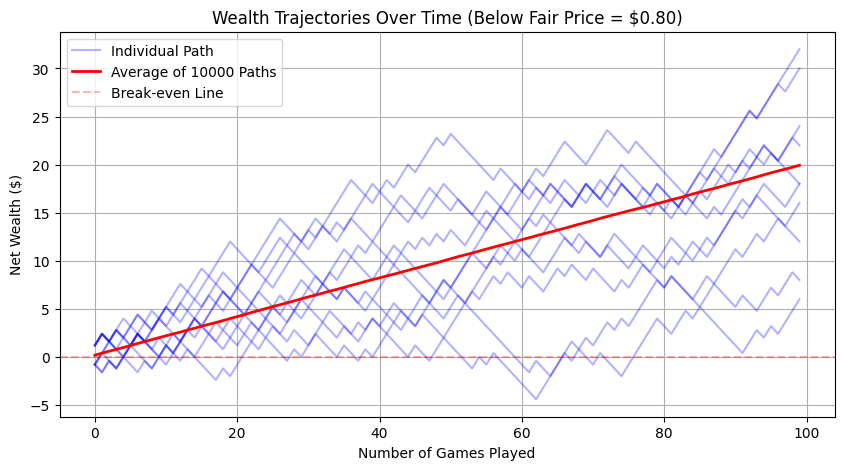

In [5]:
# Generate multiple paths for below EV price
n_trials = 100  # Match the length returned by simulate_coin_game
n_paths = 10000
all_paths_below = np.zeros((n_paths, n_trials))

# Calculate expected value per game
expected_value = 2 * 0.5 - below_ev_price  # $2 with prob 0.5, -price with prob 1
expected_value_100_games = expected_value * n_trials
print(f"Analytical expected value after {n_trials} games: ${expected_value_100_games:.2f}")

for i in range(n_paths):
    all_paths_below[i] = simulate_coin_game(below_ev_price, n_trials)

terminal_wealths_below = all_paths_below[:,-1]
avg_terminal_wealth_below = np.mean(terminal_wealths_below)
print(f"Average terminal wealth across {n_paths} paths: ${avg_terminal_wealth_below:.2f}")

# Plot multiple paths
plt.figure(figsize=(10,5))

# Plot 10 sample paths
for i in range(10):
    plt.plot(all_paths_below[i], alpha=0.3, color='blue',
             label='Individual Path' if i == 0 else "_nolegend_")

# Calculate and plot average path
average_path_below = np.mean(all_paths_below, axis=0)
plt.plot(average_path_below, color='red', linewidth=2, label=f'Average of {n_paths} Paths')
plt.axhline(y=0, color='r', linestyle='--', alpha=0.3, label='Break-even Line')
plt.title('Wealth Trajectories Over Time (Below Fair Price = $0.80)')
plt.xlabel('Number of Games Played')
plt.ylabel('Net Wealth ($)')
plt.legend()
plt.grid(True)
plt.show()

## Scenario 3: Pay Above Expected Value

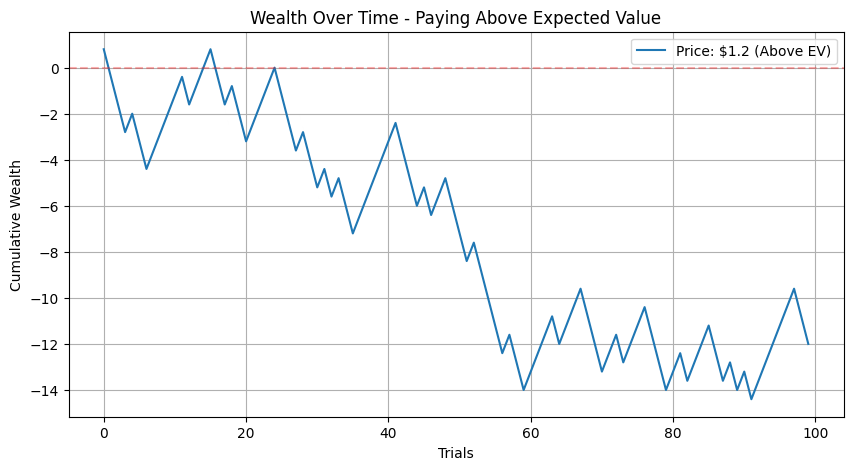

In [6]:
# Simulate paying above expected value
above_ev_price = 1.20
wealth_above = simulate_coin_game(above_ev_price, 100)

plt.figure(figsize=(10,5))
plt.plot(wealth_above, label=f'Price: ${above_ev_price} (Above EV)')
plt.axhline(y=0, color='r', linestyle='--', alpha=0.3)
plt.title('Wealth Over Time - Paying Above Expected Value')
plt.xlabel('Trials')
plt.ylabel('Cumulative Wealth')
plt.legend()
plt.grid(True)
plt.show()

Analytical expected value after 100 games: $-20.00
Average terminal wealth across 10000 paths: $-20.03


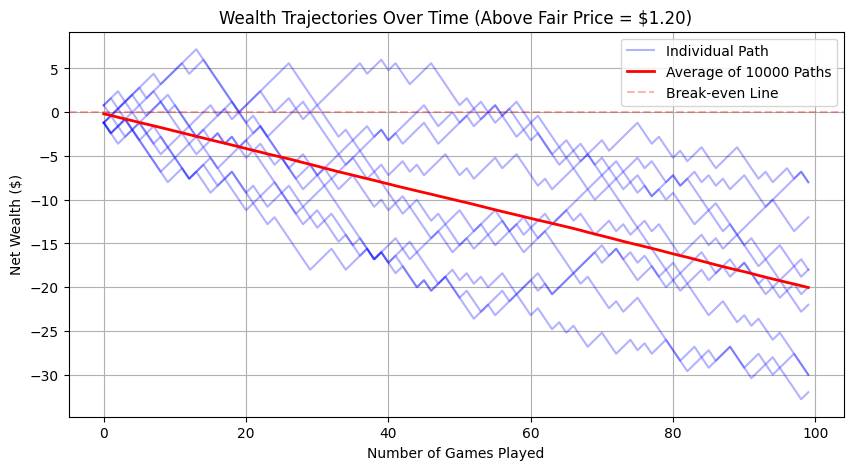

In [7]:
# Generate multiple paths for above EV price
n_trials = 100  # Match the length returned by simulate_coin_game
n_paths = 10000
all_paths_above = np.zeros((n_paths, n_trials))

# Calculate expected value per game
expected_value = 2 * 0.5 - above_ev_price  # $2 with prob 0.5, -price with prob 1
expected_value_100_games = expected_value * n_trials
print(f"Analytical expected value after {n_trials} games: ${expected_value_100_games:.2f}")

for i in range(n_paths):
    all_paths_above[i] = simulate_coin_game(above_ev_price, n_trials)

terminal_wealths_above = all_paths_above[:,-1]
avg_terminal_wealth_above = np.mean(terminal_wealths_above)
print(f"Average terminal wealth across {n_paths} paths: ${avg_terminal_wealth_above:.2f}")

# Plot multiple paths
plt.figure(figsize=(10,5))

# Plot 10 sample paths
for i in range(10):
    plt.plot(all_paths_above[i], alpha=0.3, color='blue',
             label='Individual Path' if i == 0 else "_nolegend_")

# Calculate and plot average path
average_path_above = np.mean(all_paths_above, axis=0)
plt.plot(average_path_above, color='red', linewidth=2, label=f'Average of {n_paths} Paths')
plt.axhline(y=0, color='r', linestyle='--', alpha=0.3, label='Break-even Line')
plt.title('Wealth Trajectories Over Time (Above Fair Price = $1.20)')
plt.xlabel('Number of Games Played')
plt.ylabel('Net Wealth ($)')
plt.legend()
plt.grid(True)
plt.show()

## Compare all three scenarios

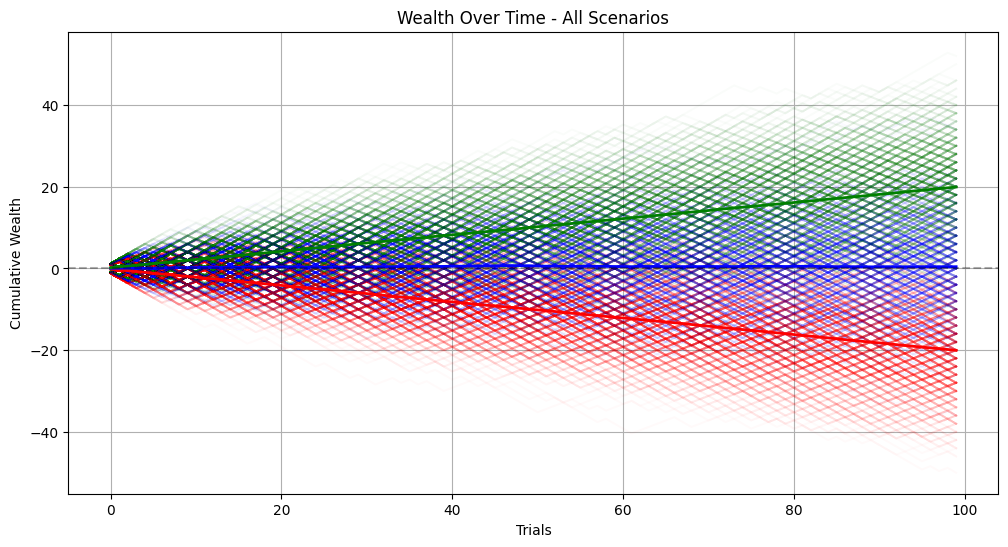

In [8]:
plt.figure(figsize=(12,6))
# Generate multiple paths for fair price
n_trials = 100  # Match the length returned by simulate_coin_game
n_paths = 1000
all_paths_fair = np.zeros((n_paths, n_trials))

for i in range(n_paths):
    all_paths_fair[i] = simulate_coin_game(fair_price, n_trials)

# Plot individual paths for each scenario
for i in range(n_paths):
    plt.plot(all_paths_above[i], alpha=0.02, color='red', label='Above EV Path' if i==0 else "_nolegend_")
    plt.plot(all_paths_fair[i], alpha=0.02, color='blue', label='Fair Path' if i==0 else "_nolegend_")
    plt.plot(all_paths_below[i], alpha=0.02, color='green', label='Below EV Path' if i==0 else "_nolegend_")

# Plot average paths
plt.plot(np.mean(all_paths_above, axis=0), color='red', linewidth=2, label=f'Average Price: ${above_ev_price} (Above EV)')
plt.plot(np.mean(all_paths_fair, axis=0), color='blue', linewidth=2, label=f'Average Price: ${fair_price} (Fair)')
plt.plot(np.mean(all_paths_below, axis=0), color='green', linewidth=2, label=f'Average Price: ${below_ev_price} (Below EV)')

plt.axhline(y=0, color='black', linestyle='--', alpha=0.3)
plt.title('Wealth Over Time - All Scenarios')
plt.xlabel('Trials')
plt.ylabel('Cumulative Wealth')
plt.grid(True)
plt.show()

## Part 2: Dice Game

Roll a fair 6-sided die. You get paid the number rolled in dollars.

Let's compute the expected value and simulate it.

In [9]:
expected_value_dice = np.mean(np.arange(1, 7))  # values 1 through 6
expected_value_dice

3.5

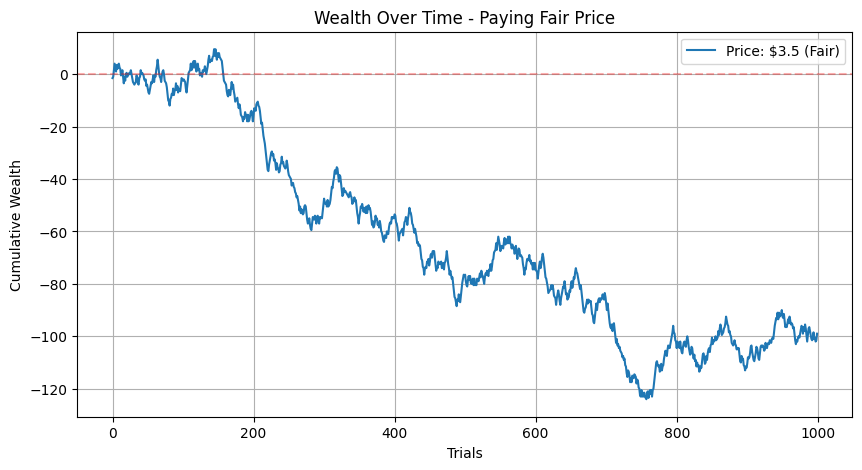

In [10]:
def simulate_dice_game(price, n_trials=1000):
    outcomes = np.random.choice(np.arange(1, 7), size=n_trials)
    net_gain = outcomes - price
    wealth = np.cumsum(net_gain)
    return wealth

# Simulate paying fair price
fair_price = 3.50
wealth_fair = simulate_dice_game(fair_price)

plt.figure(figsize=(10,5))
plt.plot(wealth_fair, label=f'Price: ${fair_price} (Fair)')
plt.axhline(y=0, color='r', linestyle='--', alpha=0.3)
plt.title('Wealth Over Time - Paying Fair Price')
plt.xlabel('Trials')
plt.ylabel('Cumulative Wealth')
plt.legend()
plt.grid(True)
plt.show()

## Scenario 2: Pay Below Expected Value

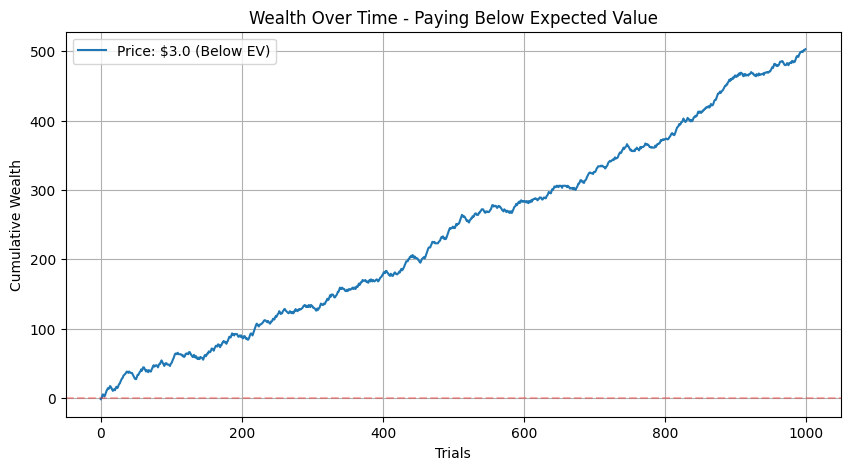

In [11]:
# Simulate paying below expected value
below_ev_price = 3.00
wealth_below = simulate_dice_game(below_ev_price)

plt.figure(figsize=(10,5))
plt.plot(wealth_below, label=f'Price: ${below_ev_price} (Below EV)')
plt.axhline(y=0, color='r', linestyle='--', alpha=0.3)
plt.title('Wealth Over Time - Paying Below Expected Value')
plt.xlabel('Trials')
plt.ylabel('Cumulative Wealth')
plt.legend()
plt.grid(True)
plt.show()

## Scenario 3: Pay Above Expected Value

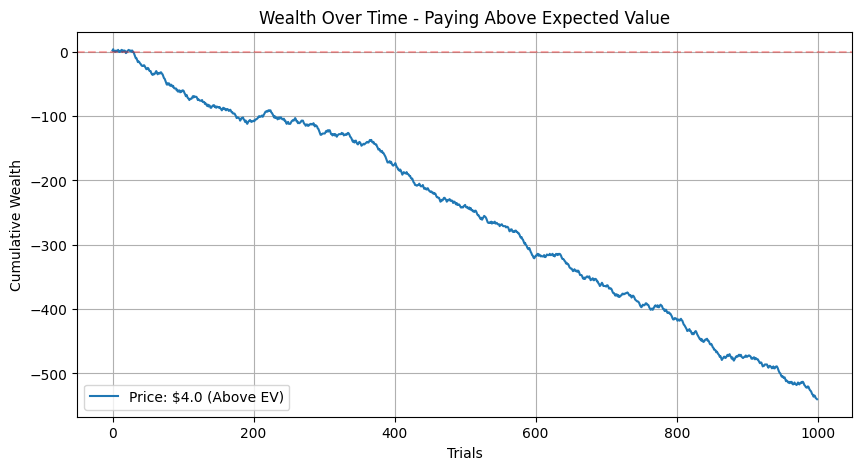

In [12]:
# Simulate paying above expected value
above_ev_price = 4.00
wealth_above = simulate_dice_game(above_ev_price)

plt.figure(figsize=(10,5))
plt.plot(wealth_above, label=f'Price: ${above_ev_price} (Above EV)')
plt.axhline(y=0, color='r', linestyle='--', alpha=0.3)
plt.title('Wealth Over Time - Paying Above Expected Value')
plt.xlabel('Trials')
plt.ylabel('Cumulative Wealth')
plt.legend()
plt.grid(True)
plt.show()

## Compare All Three Scenarios

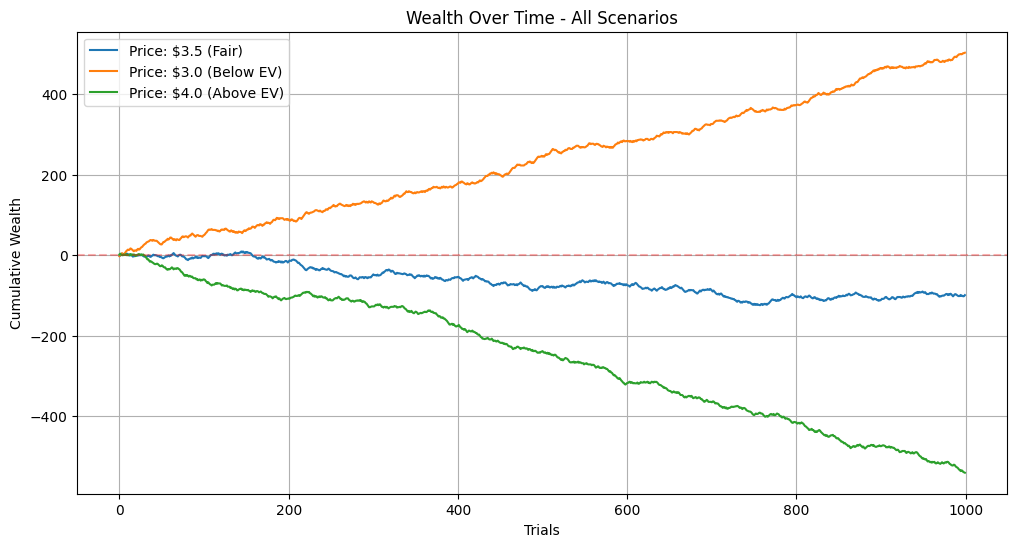

In [13]:
plt.figure(figsize=(12,6))
plt.plot(wealth_fair, label=f'Price: ${fair_price} (Fair)')
plt.plot(wealth_below, label=f'Price: ${below_ev_price} (Below EV)')
plt.plot(wealth_above, label=f'Price: ${above_ev_price} (Above EV)')
plt.axhline(y=0, color='r', linestyle='--', alpha=0.3)
plt.title('Wealth Over Time - All Scenarios')
plt.xlabel('Trials')
plt.ylabel('Cumulative Wealth')
plt.legend()
plt.grid(True)
plt.show()

## A Basic Stochastic Process
Let’s simulate a simple stochastic process like geometric Brownian motion (GBM) to understand expected value in a continuous setting.

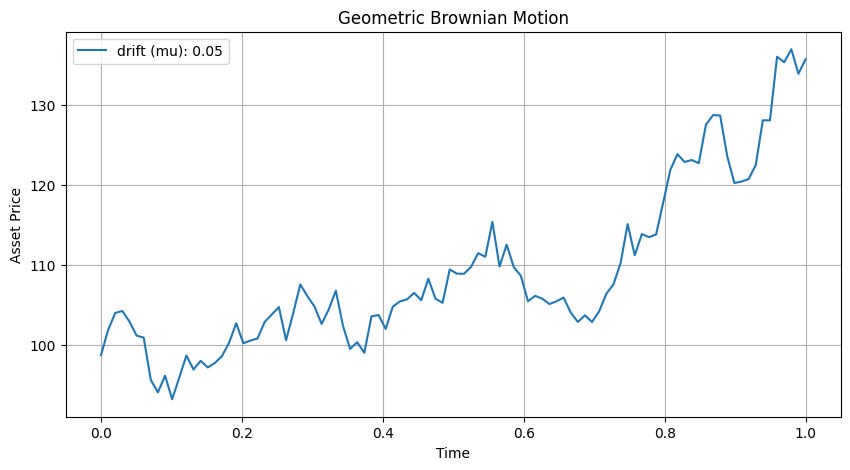

In [14]:
def simulate_gbm(mu, sigma, S0, dt, T):
    N = int(T / dt)
    t = np.linspace(0, T, N)
    W = np.random.standard_normal(size=N)
    W = np.cumsum(W) * np.sqrt(dt)
    X = (mu - 0.5 * sigma**2) * t + sigma * W
    S = S0 * np.exp(X)
    return t, S

T = 1.0       # 1 year
dt = 0.01
S0 = 100
mu_values = [0.05, -0.05]  # drift: positive and negative
sigma = 0.2

plt.figure(figsize=(10,5))
for mu in mu_values[:1]:
    t, S = simulate_gbm(mu, sigma, S0, dt, T)
    plt.plot(t, S, label=f'drift (mu): {mu}')

plt.title('Geometric Brownian Motion')
plt.xlabel('Time')
plt.ylabel('Asset Price')
plt.legend()
plt.grid(True)
plt.show()

## Option Game – Payoff Based on GBM Threshold
We now consider a game where you earn the difference between the asset price and a threshold (strike price) if the asset finishes above that level at the end of the period. Otherwise, you earn nothing.

This is essentially a European Call Option:
$$ Payoff = \max(S_t - K, 0)$$
We will simulate the GBM, compute option payoffs, and compare pricing versus expected value.

In [15]:
def simulate_option_game(S0=100, K=110, mu=0.05, sigma=0.2, T=1.0, dt=0.01, n_sim=10000):
    N = int(T / dt)
    Z = np.random.standard_normal((n_sim, N))
    W = np.cumsum(Z, axis=1) * np.sqrt(dt)
    t = np.linspace(0, T, N)
    drift = (mu - 0.5 * sigma**2) * t
    diffusion = sigma * W
    S = S0 * np.exp(drift + diffusion)
    ST = S[:, -1]
    payoffs = np.maximum(ST - K, 0)
    return payoffs, ST

# Parameters
S0 = 100
K = 120
mu = 0.07
sigma = 0.25
T = 1
dt = 0.01
n_sim = 10000

payoffs, ST = simulate_option_game(S0, K, mu, sigma, T, dt, n_sim)
expected_value_option = np.mean(payoffs)

print(f"Expected Value of Option Payoff: ${expected_value_option:.2f}")

Expected Value of Option Payoff: $6.01


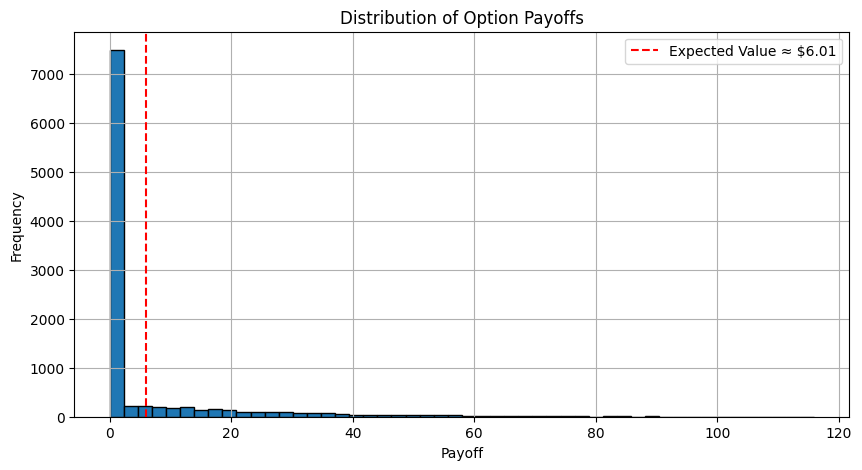

In [16]:
plt.figure(figsize=(10,5))
plt.hist(payoffs, bins=50, edgecolor='black')
plt.title('Distribution of Option Payoffs')
plt.xlabel('Payoff')
plt.ylabel('Frequency')
plt.grid(True)
plt.axvline(expected_value_option, color='red', linestyle='--', label=f'Expected Value ≈ ${expected_value_option:.2f}')
plt.legend()
plt.show()

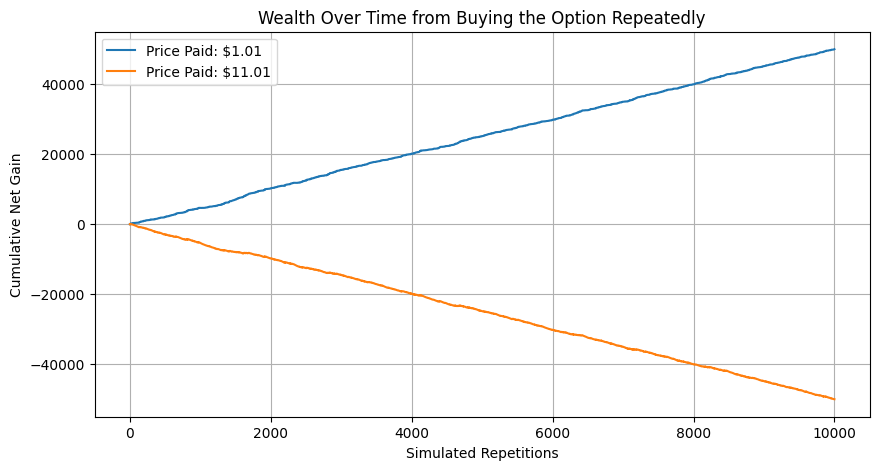

In [17]:
def simulate_wealth_from_option(price_paid, payoffs):
    net_gain = payoffs - price_paid
    wealth = np.cumsum(net_gain)
    return wealth

plt.figure(figsize=(10,5))
for price in [expected_value_option - 5, expected_value_option + 5]:
    wealth = simulate_wealth_from_option(price, payoffs)
    plt.plot(wealth, label=f'Price Paid: ${price:.2f}')

plt.title('Wealth Over Time from Buying the Option Repeatedly')
plt.xlabel('Simulated Repetitions')
plt.ylabel('Cumulative Net Gain')
plt.legend()
plt.grid(True)
plt.show()